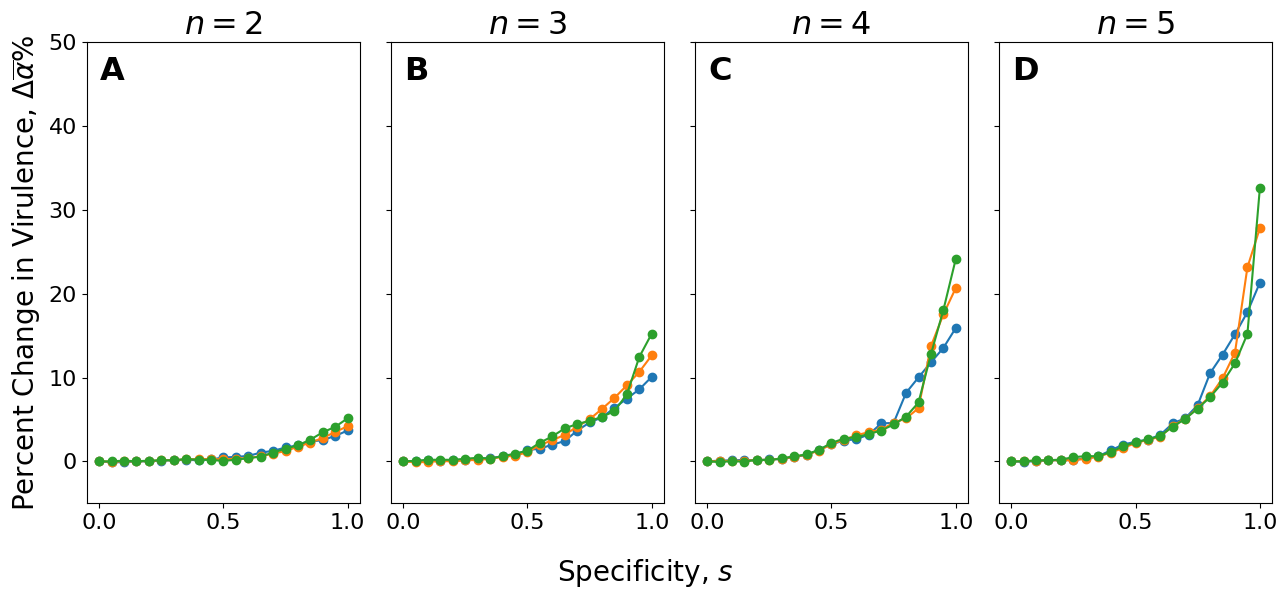

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('param_sweep_parallel.csv') 
unique_n = df['N'].unique()
fig, axes = plt.subplots(1, len(unique_n), figsize=(13, 6), sharey=True)

panel_labels = ['A', 'B', 'C', 'D']

for idx, (ax, (n_val, dsub)) in enumerate(zip(axes, df.groupby('N'))):
    for theta_tilde, gsub in dsub.groupby('theta'):
        gsort = gsub.sort_values('s')
        baseline = gsort[gsort['s'] == 0]['mean_virulence'].values[0]
        percent_change = 100 * (gsort['mean_virulence'] - baseline) / baseline
        ax.plot(gsort['s'], percent_change, marker='o', label=rf'$\tilde{{\theta}}={theta_tilde}$')
    
    ax.set_title(rf'$n={n_val}$', fontsize=23)
    ax.text(0.05, 0.97, panel_labels[idx], transform=ax.transAxes, fontsize=23, ha='left', va='top', fontweight='bold')
    ax.set_ylim(-5, 50)
    ax.tick_params(axis='both', which='major', labelsize=16)

axes[0].set_ylabel(r'Percent Change in Virulence, $\Delta\overline{\alpha} \%$', fontsize=20)
fig.supxlabel(r'Specificity, $s$', fontsize=20)
plt.tight_layout()
plt.savefig('parameter_sweep_percent_change.eps', dpi=500)
plt.show()